In [1]:
%matplotlib inline
from datatypes import ImageTraining as it
from models import Models, CNN_models
from DataProcessing import transformations
import numpy as np
from misc import utils
import os
import cv2
from collections import Counter
from matplotlib import pyplot as plt
import models.pretrained as pt
from visualization import ModelHistoryPlot

Using TensorFlow backend.


In [2]:
aphid = '/Users/niquo/Documents/SUMMER17/makerere_projects/cowpea_diseased_leaves/aphid_born/'
mildew = '/Users/niquo/Documents/SUMMER17/makerere_projects/cowpea_diseased_leaves/powdery_mildew/'
cercospora = '/Users/niquo/Documents/SUMMER17/makerere_projects/cowpea_diseased_leaves/cercospora/'

label_dict = {0: [aphid], 1: [mildew], 2: [cercospora]}

In [3]:
batch_size = 16
target_size = (150, 150)

itrain = it.ImageTraining(label_dict)
traingen, testgen = itrain.get_train_test_generators(batch_size=batch_size, target_size=target_size)

Found 50 examples with label 0
Found 68 examples with label 1
Found 93 examples with label 2
partitioning data with train size 168 and test size 42


In [4]:
train_batches = (traingen.samples / traingen.batch_size)*4
print 'total training batches:', train_batches

total training batches: 40


In [5]:
output_train = 'serialized_objects/0810/cowpea_outputtrain_rand1.npy'
output_val = 'serialized_objects/0810/cowpea_outputval_rand1.npy'
labels = 'serialized_objects/0810/cowpea_labels_rand1.p'

pt.get_output_values(traingen, testgen, output_train, output_val, labels, train_batches=train_batches)

loading vgg model...
image target size (150, 150) with batch size 16
running training examples through top model...
running model with 40 training batches and 616 total samples
training labels shape: (616, 3)
final shape of bottleneck_features_train: (616, 4, 4, 512)
running validation examples through top model...
running model with 3 validation batches of data
final shape of bottleneck_features_validation: (43, 4, 4, 512)


In [6]:
full_model_json = 'serialized_objects/0810/model_object_rand1.json'
weights_path = 'serialized_objects/0810/model_weights_rand1.hd5'
epochs = 100
num_classes = 3


model_history = pt.train_top_model(full_model_json, weights_path, output_train, output_val,
                                   labels, epochs=epochs, batch_size=batch_size, num_classes=num_classes)

train top model
loaded 616 training labels and 43 validation labels.
loading bottleneck_trian_npy...
loaded 616 training data samples
loading bottleneck_val_npy...
loaded 43 validation data samples
fitting model...
Train on 616 samples, validate on 43 samples
Epoch 1/100
616/616 [==============================] - 1s - loss: 2.0639 - acc: 0.4870 - val_loss: 0.9572 - val_acc: 0.5814
Epoch 2/100
616/616 [==============================] - 1s - loss: 0.6623 - acc: 0.7370 - val_loss: 0.9707 - val_acc: 0.6279
Epoch 3/100
616/616 [==============================] - 1s - loss: 0.6126 - acc: 0.7419 - val_loss: 1.0200 - val_acc: 0.6047
Epoch 4/100
616/616 [==============================] - 1s - loss: 0.3939 - acc: 0.8523 - val_loss: 1.4717 - val_acc: 0.4884
Epoch 5/100
616/616 [==============================] - 1s - loss: 0.3361 - acc: 0.8636 - val_loss: 1.0730 - val_acc: 0.5814
Epoch 6/100
616/616 [==============================] - 1s - loss: 0.3145 - acc: 0.8799 - val_loss: 0.9383 - val_acc: 0.7

['acc', 'loss', 'val_acc', 'val_loss']


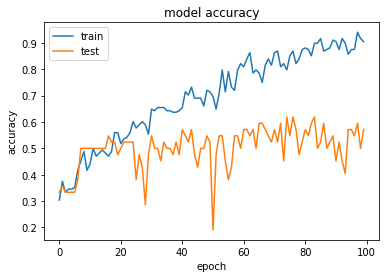

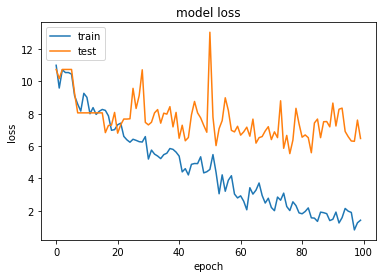

In [23]:
ModelHistoryPlot.plot_history(model_history)